### Name: Diego Bolanos
### ID: 8946481

In [29]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## **Part 1: Clustering**

In [30]:
# Load the Iris Flower Dataset from sklearn
iris = load_iris()
X = iris.data
y = iris.target

# Print the shape of the data
print(X.shape)


(150, 4)


#### 1. Utilize one of the dimensionality reduction techniques discussed in class to reduce the number of dimensions from 4 to 2.

In [31]:
# Use PCA for dimensionality reduction to 2 dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Print the shape of the data after dimensionality reduction
X_reduced.shape

(150, 2)

#### 2. Utilize a clustering technique to cluster the flowers (after dimensionality reduction) into N clusters where N is the number of flowers available in the dataset.

In [32]:
# Use KMeans clustering
n_clusters = len(set(y))
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

#### 3. Plot the clustered data points on a 2D grid and show the formed clusters. Comment on whether each cluster corresponds to a flower type

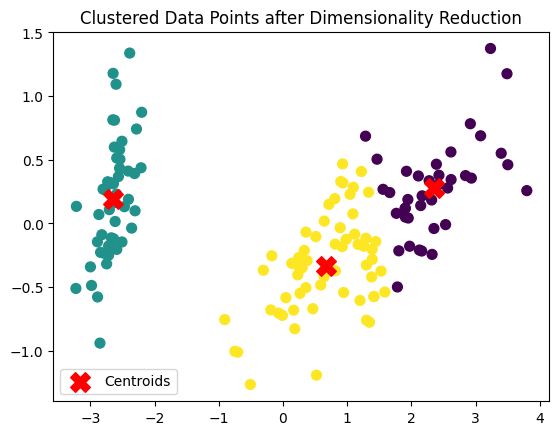

In [33]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustered Data Points after Dimensionality Reduction')
plt.legend()
plt.show()

By seeing the graph, each cluster corresponds to a flower type because the clusters are visibles and successfully separates the data points into three clusters.

#### 4. Determine if normalization of features leads to better dimensionality reduction and clustering ofclasses of flowers.

In [34]:
from sklearn.preprocessing import StandardScaler

# Normalize features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply PCA to normalized data
X_reduced_normalized = pca.fit_transform(X_normalized)

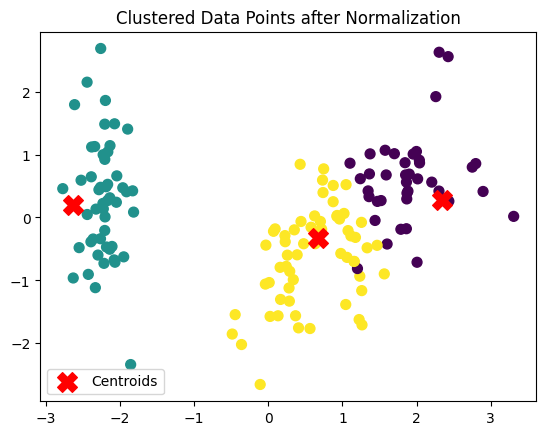

In [35]:
plt.scatter(X_reduced_normalized[:, 0], X_reduced_normalized[:, 1], c=clusters, s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clustered Data Points after Normalization')
plt.legend()
plt.show()

It's not necessary to normalize the features because the data is normalized when we use PCA to reduce the dimensionality. Besides, the Centroids are a little bit different when we normalize the features.

## **Part 2: Model Training and Evaluation**

In [36]:
# Load the dataset
stroke_data_df = pd.read_csv('/Users/diegobolanos/Downloads/stroke.csv')
stroke_data_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### **Data Preprocessing**

In [37]:
# Extract the numerical columns from the dataset
numerical_columns = stroke_data_df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

#### a. Fill in the missing values in numerical/categorical columns with an appropriate way

In [38]:
# Fill the missing values in the numerical columns with the mean
imputer = SimpleImputer(strategy='mean')
stroke_data_df[numerical_columns] = imputer.fit_transform(stroke_data_df[numerical_columns])
stroke_data_df[numerical_columns].head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046.0,67.0,0.0,1.0,228.69,36.600000,1.0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0


In [39]:
# Handle missing values in categorical columns using the most frequent value
categorical_columns = stroke_data_df.select_dtypes(include='object').columns
imputer_categorical = SimpleImputer(strategy='most_frequent')
stroke_data_df[categorical_columns] = imputer_categorical.fit_transform(stroke_data_df[categorical_columns])
stroke_data_df[categorical_columns].head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked


#### b. Encode the categorical features using categorical encoding

In [40]:
# Encode the categorical features using categorical encoding (One-Hot Encoding)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = pd.DataFrame(encoder.fit_transform(stroke_data_df[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))
stroke_data_df_encoded = pd.concat([stroke_data_df, encoded_features], axis=1)
stroke_data_df_encoded.drop(categorical_columns, axis=1, inplace=True)

stroke_data_df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046.0,67.0,0.0,1.0,228.69,36.600000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,51676.0,61.0,0.0,0.0,202.21,28.893237,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31112.0,80.0,0.0,1.0,105.92,32.500000,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60182.0,49.0,0.0,0.0,171.23,34.400000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1665.0,79.0,1.0,0.0,174.12,24.000000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### **ML Model Training and Testing Tasks**

#### 1. Split the processed data into training and testing sets (e.g., 80% training, 20% testing).

In [41]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = stroke_data_df_encoded.drop('stroke', axis=1)
y = stroke_data_df_encoded['stroke']

smote = SMOTE(random_state=42,sampling_strategy=0.4,k_neighbors=10)

X , y = smote.fit_resample(X , y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### 2. Train the MLP model on the training set, however you need to do a comparison between the performance of the model on a validation set (with cross-validation) using different hyperparameter values

In [42]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Define the MLP model
mlp_model = MLPClassifier()

# Define hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64), (256,), (256, 128), (64, 64), (128, 128), (256, 256), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(64,), (64, 32), (128,),
                                                (128, 64), (256,), (256, 128),
                                                (64, 64), (128, 128),
                                                (256, 256), (128, 64, 32)],
                         'learning_rate_init': [0.001, 0.01, 0.1]},
             scoring='f1', verbose=1)

#### 3. Comment on the best parameters found in step 2.

In [43]:
# Display the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")


Best Parameters: {'hidden_layer_sizes': (128, 128), 'learning_rate_init': 0.01}


#### 4. Evaluate the top-performing model from step 2 on the test set and report their F1-Score.

In [44]:
from sklearn.metrics import f1_score

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1-Score on Test Set: {f1}")


F1-Score on Test Set: 0.36363636363636365


#### 5. Carry out PCA to reduce the dimensions of the dataset to a smaller size, then draw the scree plot and determine the optimal number of new dimensions.

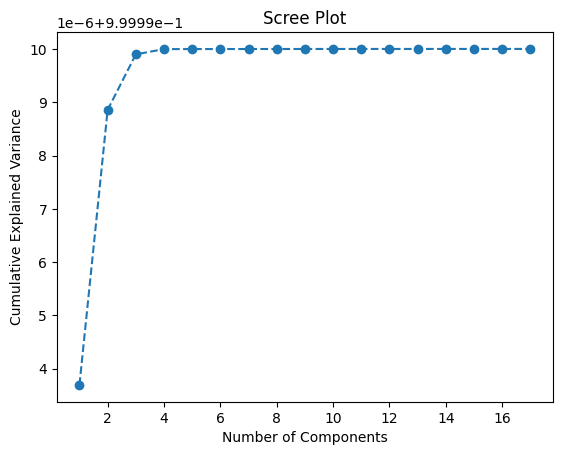

In [49]:
import matplotlib.pyplot as plt

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

# Scree Plot
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


#### 6. Repeat step 2 and 4 again with the new dataset after dimensionality reduction with the optimal number of dimensions.
a. Note: Evaluate the new model on the same test set as step 4, but after applying
dimensionality reduction on it.

In [46]:
# Define the MLP model
mlp_model = MLPClassifier()

# Define hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128,), (128, 64), (256,), (256, 128), (64, 64), (128, 128), (256, 256), (128, 64, 32)],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp_model, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Perform grid search on the reduced data
grid_search.fit(X_pca, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Evaluate on the test set
X_test_reduced = pca.transform(X_test)
y_pred = best_model.predict(X_test_reduced)
f1_dr = f1_score(y_test, y_pred)
print(f"Dimensionality Reduction Improved F1-Score: {f1_dr}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Dimensionality Reduction Improved F1-Score: 0.5046728971962617


#### 7. Compare and comment on the outputs of Step 4 and 6 and determine whether dimensionality reduction lead to performance enhancement.

In [48]:
print(f"Original F1-Score: {f1}")
print(f"Dimensionality Reduction F1-Score: {f1_dr}")

Original F1-Score: 0.36363636363636365
Dimensionality Reduction F1-Score: 0.5046728971962617


By seeing the results, we can conclude that dimensionality reduction improved the F1-Score of the model, and it helped in enhancing the performance of the model.